In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import metrics
from keras.regularizers import l2
from keras import optimizers
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
train=pd.read_csv('/home/siddharth/Documents/ml data/digit recognition/train.csv')
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
Ytrain=train['label']
Xtrain=train.drop(['label'],axis=1)

In [5]:
Xtrain.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

KeyError: 6

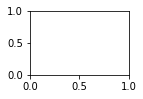

In [20]:
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
    plt.title(Ytrain[i]);

In [33]:
'''Xtrain = Xtrain.reshape(Xtrain.shape[0],784)
Xtrain.shape'''
Xtrain=Xtrain/255

In [28]:
#one-hot encoding the labels
Ytrain=pd.get_dummies(Ytrain)
Ytrain.head()

,0,1,2,3,4,5,6,7,8,9
4905,0,0,0,0,0,1,0,0,0,0
33332,0,0,0,0,0,0,0,1,0,0
25317,1,0,0,0,0,0,0,0,0,0
29800,0,0,0,1,0,0,0,0,0,0
32100,0,1,0,0,0,0,0,0,0,0


In [29]:
seed=2
Xtrain,Xval,Ytrain,Yval=train_test_split(Xtrain,Ytrain,test_size=0.25,random_state=seed)

In [58]:
def create_model():
    model=Sequential()
    model.add(Dense(512,input_shape=(784,),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
  
    model.compile(optimizer= 'adam' ,loss = 'mean_squared_error', metrics =['accuracy'])
    
    return model


In [59]:
model=create_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(Xtrain, Ytrain, validation_data=(Xval,Yval), epochs=20, batch_size=128)

Train on 17718 samples, validate on 5907 samples
Epoch 1/20
17718/17718 [==============================] - 5s 266us/step - loss: 0.0653 - accuracy: 0.5725 - val_loss: 893.8001 - val_accuracy: 0.7427
Epoch 2/20
17718/17718 [==============================] - 5s 291us/step - loss: 0.0315 - accuracy: 0.8629 - val_loss: 1529.8297 - val_accuracy: 0.8106
Epoch 3/20
17718/17718 [==============================] - 5s 268us/step - loss: 0.0213 - accuracy: 0.9087 - val_loss: 1484.9267 - val_accuracy: 0.8419
Epoch 4/20
17718/17718 [==============================] - 3s 177us/step - loss: 0.0176 - accuracy: 0.9236 - val_loss: 1130.1811 - val_accuracy: 0.8803
Epoch 5/20
17718/17718 [==============================] - 5s 275us/step - loss: 0.0152 - accuracy: 0.9348 - val_loss: 826.2787 - val_accuracy: 0.9135
Epoch 6/20
17718/17718 [==============================] - 5s 283us/step - loss: 0.0136 - accuracy: 0.9414 - val_loss: 605.7855 - val_accuracy: 0.9287
Epoch 7/20
17718/17718 [========================

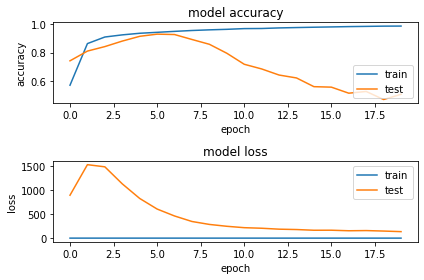

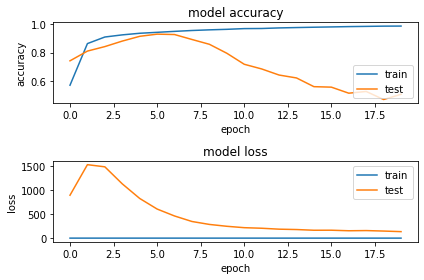

In [61]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig